# Disease Outbreak Prediction Using Time Series Analysis


## Introduction
In the field of public health, timely and accurate forecasting of disease outbreaks is essential for minimizing the impact of infectious diseases. Historical and seasonal data patterns can reveal trends that help in predicting future outbreak incidents, allowing healthcare systems to respond proactively. This project, Disease Outbreak Prediction Using Time Series Analysis, focuses on forecasting disease incidence rates to support the healthcare system’s preparedness in allocating resources. By leveraging time-series models such as ARIMA and SARIMA, this project aims to empower healthcare providers to better manage outbreaks, reducing their overall impact.

## Project Objectives
The primary objectives of this project are as follows:
1. To build a predictive model capable of forecasting disease outbreak trends based on historical and seasonal patient data.
2. To enable proactive resource allocation by identifying potential peaks in disease incidence, thereby aiding in timely preventive measures.
3. To improve public health response strategies by providing data-driven insights to minimize the spread and impact of infectious diseases.
4. To validate model accuracy and effectiveness through continuous evaluation, ensuring that the model performs reliably for effective public health planning.

## Project Overview
This project employs ARIMA and SARIMA time-series models to analyze disease outbreak data, focusing on the seasonal and historical trends of incidence rates. By utilizing these predictive models, the project forecasts potential disease spikes, offering insights that help healthcare providers allocate resources preemptively. The analysis, based on statistical and machine learning techniques, emphasizes accuracy and scalability, aiming to provide a robust framework for healthcare systems in managing and mitigating outbreak risks. Through this approach, the project underscores the value of predictive analytics in enhancing public health readiness.

### Importing required Python Packages and Libraries

In [356]:
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt, SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Install packages if not already installed (Uncomment the lines below to run them)
# !pip install plotly
# !pip install Jinja2

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Check if packages are installed, if not, you can uncomment the install commands above.

In [357]:
covid = pd.read_csv("D:/projects/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000


In [358]:
#Extracting India's data 
covid_india=covid[covid['Country/Region']=="India"]

#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]
covid_uk=covid[covid['Country/Region']=="UK"]
covid_br=covid[covid['Country/Region']=="Brazil"]
covid_russia=covid[covid['Country/Region']=="Russia"]

#Extracting data of neighbouring countries
covid_pak=covid[covid['Country/Region']=="Pakistan"]
covid_china=covid[covid['Country/Region']=="Mainland China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [359]:
#Converting the date into Datetime format
covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])
covid_spain["ObservationDate"]=pd.to_datetime(covid_spain["ObservationDate"])
covid_us["ObservationDate"]=pd.to_datetime(covid_us["ObservationDate"])
covid_italy["ObservationDate"]=pd.to_datetime(covid_italy["ObservationDate"])
covid_iran["ObservationDate"]=pd.to_datetime(covid_iran["ObservationDate"])
covid_france["ObservationDate"]=pd.to_datetime(covid_france["ObservationDate"])
covid_uk["ObservationDate"]=pd.to_datetime(covid_uk["ObservationDate"])
covid_br["ObservationDate"]=pd.to_datetime(covid_br["ObservationDate"])
covid_russia["ObservationDate"]=pd.to_datetime(covid_russia["ObservationDate"])

covid_pak["ObservationDate"]=pd.to_datetime(covid_pak["ObservationDate"])
covid_china["ObservationDate"]=pd.to_datetime(covid_china["ObservationDate"])
covid_afg["ObservationDate"]=pd.to_datetime(covid_afg["ObservationDate"])
covid_nepal["ObservationDate"]=pd.to_datetime(covid_nepal["ObservationDate"])
covid_bhutan["ObservationDate"]=pd.to_datetime(covid_bhutan["ObservationDate"])
covid_lanka["ObservationDate"]=pd.to_datetime(covid_lanka["ObservationDate"])
covid_ban["ObservationDate"]=pd.to_datetime(covid_ban["ObservationDate"])

In [360]:
#Grouping the data based on the Date 
india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
brazil_datewise=covid_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
russia_datewise=covid_russia.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [361]:
#Adding week column to perfom weekly analysis further ahead
# Adding week column to perform weekly analysis
india_datewise["WeekofYear"] = india_datewise.index.isocalendar().week
spain_datewise["WeekofYear"] = spain_datewise.index.isocalendar().week
us_datewise["WeekofYear"] = us_datewise.index.isocalendar().week
italy_datewise["WeekofYear"] = italy_datewise.index.isocalendar().week
iran_datewise["WeekofYear"] = iran_datewise.index.isocalendar().week
france_datewise["WeekofYear"] = france_datewise.index.isocalendar().week
uk_datewise["WeekofYear"] = uk_datewise.index.isocalendar().week
brazil_datewise["WeekofYear"] = brazil_datewise.index.isocalendar().week
russia_datewise["WeekofYear"] = russia_datewise.index.isocalendar().week

pak_datewise["WeekofYear"] = pak_datewise.index.isocalendar().week
china_datewise["WeekofYear"] = china_datewise.index.isocalendar().week
afg_datewise["WeekofYear"] = afg_datewise.index.isocalendar().week
nepal_datewise["WeekofYear"] = nepal_datewise.index.isocalendar().week
bhutan_datewise["WeekofYear"] = bhutan_datewise.index.isocalendar().week
lanka_datewise["WeekofYear"] = lanka_datewise.index.isocalendar().week
ban_datewise["WeekofYear"] = ban_datewise.index.isocalendar().week

In [362]:
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

In [363]:
No_Lockdown=covid_india[covid_india["ObservationDate"]<pd.to_datetime("2020-03-21")]
Lockdown_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-03-21"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-04-15"))]
Lockdown_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-04-15"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-04"))]
Lockdown_3=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-04"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-19"))]
Lockdown_4=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-19"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-05-31"))]
Unlock_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-06-01"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [364]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [365]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

## Exploratory Data Analysis for India

In [366]:
print("Number of Confirmed Cases",india_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",india_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",india_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-india_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",india_datewise["Recovered"].iloc[-1]+india_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(india_datewise["Confirmed"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(india_datewise["Recovered"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(india_datewise["Deaths"].iloc[-1]/india_datewise.shape[0]))
print("Number of New Cofirmed Cases in last 24 hours are",india_datewise["Confirmed"].iloc[-1]-india_datewise["Confirmed"].iloc[-2])
print("Number of New Recoverd Cases in last 24 hours are",india_datewise["Recovered"].iloc[-1]-india_datewise["Recovered"].iloc[-2])
print("Number of New Death Cases in last 24 hours are",india_datewise["Deaths"].iloc[-1]-india_datewise["Deaths"].iloc[-2])

Number of Confirmed Cases 4562414.0
Number of Recovered Cases 3542663.0
Number of Death Cases 76271.0
Number of Active Cases 943480.0
Number of Closed Cases 3618934.0
Approximate Number of Confirmed Cases per day 20277
Approximate Number of Recovered Cases per day 15745
Approximate Number of Death Cases per day 339
Number of New Cofirmed Cases in last 24 hours are 96551.0
Number of New Recoverd Cases in last 24 hours are 70880.0
Number of New Death Cases in last 24 hours are 1209.0


#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is probable an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically.

In [367]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19.

In [368]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Recovered"]+india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### Growth Rate of Confirmed, Recoverd and Death Cases

In [369]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Higher Exponential growth of Confirmed Cases in comparison to Recovered and Death Cases is a conclusive evidence why there is increase in number of Active Cases.

#### Recovery and Mortality Rate

In [370]:
print('Mean Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean())
print('Mean Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean())
print('Median Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).median())
print('Median Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).median())

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]/india_datewise["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Deaths"]/india_datewise["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mean Recovery Rate:  44.25516688123502
Mean Mortality Rate:  2.1364434000230186
Median Recovery Rate:  48.402198937212525
Median Mortality Rate:  2.4880750356519554


#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

### Growth Factor for different types of Cases 
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

In [371]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"]/india_datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"]/india_datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"]/india_datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Growth Factor of Recoverd Cases is constantly very close to 1 indicating the Recovery Rate very low which was high intially as discussed earlier, with Growth Factor of Confirmed and Death Cases well above 1 is an indication of considerable growth in both types of Cases.

### Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

A growth factor **below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases**.

In [372]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, 
                        y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])/(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"])/(india_datewise["Recovered"]+india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [373]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [374]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().rolling(window=7).mean().diff(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling mean of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [375]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Closed Cases'))
fig.update_layout(title="7 Days Rolling mean of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [376]:
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(india_datewise["WeekofYear"].unique()):
    india_weekwise_confirmed.append(india_datewise[india_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(india_datewise[india_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(india_datewise[india_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1

In [377]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [378]:
print("Average weekly increase in number of Confirmed Cases",round(pd.Series(india_weekwise_confirmed).diff().fillna(0).mean()))
print("Average weekly increase in number of Recovered Cases",round(pd.Series(india_weekwise_recovered).diff().fillna(0).mean()))
print("Average weekly increase in number of Death Cases",round(pd.Series(india_weekwise_deaths).diff().fillna(0).mean()))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0),
          name="Weekly rise in number of Confirmed Cases"),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_deaths).diff().fillna(0),
          name="Weekly rise in number of Death Cases"),
    row=1, col=2
)
fig.update_layout(title="India's Weekly increas in Number of Confirmed and Death Cases",
    font=dict(
        size=10,
    )
)
fig.update_layout(width=900,legend=dict(x=0,y=-0.5,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Number of Cases", row=1, col=2)
fig.show()

Average weekly increase in number of Confirmed Cases 138255
Average weekly increase in number of Recovered Cases 107353
Average weekly increase in number of Death Cases 2311


### Doubling Rate of COVID-19 Confirmed Cases

In [379]:
cases=65
double_days=[]
C=[]
while(1):
    double_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
cases=65
tipling_days=[]
C1=[]
while(1):
    tipling_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C1.append(cases)
    cases=cases*3
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
india_doubling=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first case"])
india_doubling["Number of days required to Double the cases"]=india_doubling["Days since first case"].diff().fillna(india_doubling["Days since first case"].iloc[0])

india_tripling=pd.DataFrame(list(zip(C1,tipling_days)),columns=["No. of cases","Days since first case"])
india_tripling["Number of days required to Triple the cases"]=india_tripling["Days since first case"].diff().fillna(india_tripling["Days since first case"].iloc[0])

india_doubling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Double the cases
0,65,41,41.000000
1,130,46,5.000000
2,260,50,4.000000
3,520,53,3.000000
4,1040,59,6.000000
5,2080,62,3.000000
6,4160,66,4.000000
7,8320,71,5.000000
8,16640,79,8.000000
9,33280,90,11.000000


### Tripling Rate of COVID-19 Confirmed Cases

In [380]:
india_tripling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Triple the cases
0,65,41,41.000000
1,195,49,8.000000
2,585,54,5.000000
3,1755,61,7.000000
4,5265,67,6.000000
5,15795,79,12.000000
6,47385,95,16.000000
7,142155,115,20.000000
8,426465,143,28.000000
9,1279395,174,31.000000


In [381]:
case_100k=5000
rise_100k=[]
C1=[]
while(1):
    rise_100k.append(int(india_datewise[india_datewise["Confirmed"]<=case_100k].iloc[[-1]]["Days Since"]))
    C1.append(case_100k)
    case_100k=case_100k+100000
    if(case_100k<india_datewise["Confirmed"].max()):
        continue
    else:
        break
rate_100k=pd.DataFrame(list(zip(C1,rise_100k)),columns=["No. of Cases","Days Since first Case"])
rate_100k["Days required for increase by 100K"]=rate_100k["Days Since first Case"].diff().fillna(rate_100k["Days Since first Case"].iloc[0])

In [382]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=rate_100k["No. of Cases"], y=rate_100k["Days required for increase by 100K"],
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.update_layout(title="Number of Days required for increase in number of cases by 100K",
                 xaxis_title="Number of Cases",yaxis_title="Number of Days")
fig.show()

## Lockdown Analysis for India

In [383]:
No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Recovered"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Recovered"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Recovered"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Recovered"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Recovered"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Recovered"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Recovered"]-Unlock_2_datewise["Deaths"]


No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days


cases=1
NL_doubling=[]
C=[]
while(1):
    NL_doubling.append(int(No_Lockdown_datewise[No_Lockdown_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<No_Lockdown_datewise["Confirmed"].max()):
        continue
    else:
        break
NL_Double_rate=pd.DataFrame(list(zip(C,NL_doubling)),columns=["No. of Cases","Days Since First Case"])
NL_Double_rate["Days required for Doubling"]=NL_Double_rate["Days Since First Case"].diff().fillna(NL_Double_rate["Days Since First Case"].iloc[0])

cases=Lockdown_1_datewise["Confirmed"].min()
L1_doubling=[]
C=[]
while(1):
    L1_doubling.append(int(Lockdown_1_datewise[Lockdown_1_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_1_datewise["Confirmed"].max()):
        continue
    else:
        break
L1_Double_rate=pd.DataFrame(list(zip(C,L1_doubling)),columns=["No. of Cases","Days Since Lockdown 1.0"])
L1_Double_rate["Days required for Doubling"]=L1_Double_rate["Days Since Lockdown 1.0"].diff().fillna(L1_Double_rate["Days Since Lockdown 1.0"].iloc[0])

cases=Lockdown_2_datewise["Confirmed"].min()
L2_doubling=[]
C=[]
while(1):
    L2_doubling.append(int(Lockdown_2_datewise[Lockdown_2_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_2_datewise["Confirmed"].max()):
        continue
    else:
        break
L2_Double_rate=pd.DataFrame(list(zip(C,L2_doubling)),columns=["No. of Cases","Days Since Lockdown 2.0"])
L2_Double_rate["Days required for Doubling"]=L2_Double_rate["Days Since Lockdown 2.0"].diff().fillna(L2_Double_rate["Days Since Lockdown 2.0"].iloc[0])

cases=Lockdown_3_datewise["Confirmed"].min()
L3_doubling=[]
C=[]
while(1):
    L3_doubling.append(int(Lockdown_3_datewise[Lockdown_3_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_3_datewise["Confirmed"].max()):
        continue
    else:
        break
L3_Double_rate=pd.DataFrame(list(zip(C,L3_doubling)),columns=["No. of Cases","Days Since Lockdown 3.0"])
L3_Double_rate["Days required for Doubling"]=L3_Double_rate["Days Since Lockdown 3.0"].diff().fillna(L3_Double_rate["Days Since Lockdown 3.0"].iloc[0])

cases=Lockdown_4_datewise["Confirmed"].min()
L4_doubling=[]
C=[]
while(1):
    L4_doubling.append(int(Lockdown_4_datewise[Lockdown_4_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Lockdown_4_datewise["Confirmed"].max()):
        continue
    else:
        break
L4_Double_rate=pd.DataFrame(list(zip(C,L4_doubling)),columns=["No. of Cases","Days Since Lockdown 4.0"])
L4_Double_rate["Days required for Doubling"]=L4_Double_rate["Days Since Lockdown 4.0"].diff().fillna(L4_Double_rate["Days Since Lockdown 4.0"].iloc[0])

cases=Unlock_1_datewise["Confirmed"].min()
UL1_doubling=[]
C=[]
while(1):
    UL1_doubling.append(int(Unlock_1_datewise[Unlock_1_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<Unlock_1_datewise["Confirmed"].max()):
        continue
    else:
        break
UL1_Double_rate=pd.DataFrame(list(zip(C,UL1_doubling)),columns=["No. of Cases","Days Since Lockdown 4.0"])
UL1_Double_rate["Days required for Doubling"]=UL1_Double_rate["Days Since Lockdown 4.0"].diff().fillna(UL1_Double_rate["Days Since Lockdown 4.0"].iloc[0])

In [384]:
print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())


fig=go.Figure()
fig.add_trace(go.Scatter(y=list(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 1.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 2.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 3.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 4.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Unlock 1.0 Active Cases'))
# fig.add_trace(go.Scatter(y=list(Unlock_2_datewise["Active Cases"]/Unlock_2_datewise["Active Cases"].shift()),
#                     mode='lines+markers',
#                     name='Growth Factor of Unlock 2.0 Active Cases'))
fig.update_layout(title="Lockdownwise Growth Factor of Active Cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average Active Cases growth rate in Lockdown 1.0:  1.1593835916264261
Median Active Cases growth rate in Lockdown 1.0:  1.1212799256202945
Average Active Cases growth rate in Lockdown 2.0:  1.0589658468208336
Median Active Cases growth rate in Lockdown 2.0:  1.055711195842128
Average Active Cases growth rate in Lockdown 3.0:  1.0433479599958473
Median Active Cases growth rate in Lockdown 3.0:  1.0438197911523128
Average Active Cases growth rate in Lockdown 4.0:  1.0366005332298471
Median Active Cases growth rate in Lockdown 4.0:  1.0443448437313414
Average Active Cases growth rate in Unlock 1.0:  1.0287584237095335
Median Active Cases growth rate in Unlock 1.0:  1.0281326187827924


### Doubling Rate in No Lockdown Period

In [385]:
NL_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since First Case,Days required for Doubling
0,1,2,2.000000
1,2,3,1.000000
2,4,31,28.000000
3,8,33,2.000000
4,16,33,0.000000
5,32,36,3.000000
6,64,41,5.000000
7,128,46,5.000000


### Doubling Rate in Lockdown 1.0

In [386]:
L1_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 1.0,Days required for Doubling
0,330.000000,0,0.000000
1,660.000000,4,4.000000
2,1320.000000,9,5.000000
3,2640.000000,13,4.000000
4,5280.000000,16,3.000000
5,10560.000000,23,7.000000


### Doubling Rate in Lockdown 2.0

In [387]:
L2_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 2.0,Days required for Doubling
0,12322.000000,0,0.000000
1,24644.000000,9,9.000000


### Doubling Rate in Lockdown 3.0

In [388]:
L3_Double_rate.style.background_gradient(cmap='Reds')

,No. of Cases,Days Since Lockdown 3.0,Days required for Doubling
0,46437.000000,0,0.000000
1,92874.000000,12,12.000000


#### All Lockdowns seems to have shown a slight effect of the Growth Rate of Active Cases implying the COVID-19 controlling practices are working well but can be improved.
#### The Growth rate of Active Cases has slowed down during each Lockdown.
#### Doubling Rate of Cases seems to have improved significantly during each Lockdown period which is a good sign
#### Growth of Active Cases is showing a increasing trend in Lockdown 4.0, probably because Lockdown 4.0 is much more lenient as compared to previous Lockdown versions.

## Comparison of India with Neighbouring Countries 

In [389]:
n_countries=["Pakistan","Mainland China","Afghanistan","Nepal","Bhutan","Sri Lanka","Bangladesh","India"]
comp_data=pd.concat([pak_datewise.iloc[[-1]],china_datewise.iloc[[-1]],afg_datewise.iloc[[-1]],nepal_datewise.iloc[[-1]],
          bhutan_datewise.iloc[[-1]],lanka_datewise.iloc[[-1]],ban_datewise.iloc[[-1]],india_datewise.iloc[[-1]]])
comp_data.drop(["Days Since", "WeekofYear"], axis=1, inplace=True)
comp_data.index=n_countries
comp_data["Mortality"]=(comp_data["Deaths"]/comp_data["Confirmed"])*100
comp_data["Recovery"]=(comp_data["Recovered"]/comp_data["Confirmed"])*100
comp_data["Survival Probability"]=(1-(comp_data["Deaths"]/comp_data["Confirmed"]))*100
comp_data.sort_values(["Confirmed"],ascending=False)
comp_data.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Survival Probability
Pakistan,300371.00,288206.00,6370.00,2.12,95.95,97.88
Mainland China,85168.00,80377.00,4634.00,5.44,94.37,94.56
Afghanistan,38572.00,31129.00,1420.00,3.68,80.70,96.32
Nepal,50465.00,35700.00,317.00,0.63,70.74,99.37
Bhutan,238.00,155.00,0.00,0.00,65.13,100.00
Sri Lanka,3155.00,2955.00,12.00,0.38,93.66,99.62
Bangladesh,332970.00,233550.00,4634.00,1.39,70.14,98.61
India,4562414.00,3542663.00,76271.00,1.67,77.65,98.33


In [390]:
print("Pakistan reported it's first confirm case on: ",pak_datewise.index[0].date())
print("China reported it's first confirm case on: ",china_datewise.index[0].date())
print("Afghanistan reported it's first confirm case on: ",afg_datewise.index[0].date())
print("Nepal reported it's first confirm case on: ",nepal_datewise.index[0].date())
print("Bhutan reported it's first confirm case on: ",bhutan_datewise.index[0].date())
print("Sri Lanka reported it's first confirm case on: ",lanka_datewise.index[0].date())
print("Bangladesh reported it's first confirm case on: ",ban_datewise.index[0].date())
print("India reported it's first confirm case on: ",india_datewise.index[0].date())

Pakistan reported it's first confirm case on:  2020-02-26
China reported it's first confirm case on:  2020-01-22
Afghanistan reported it's first confirm case on:  2020-02-24
Nepal reported it's first confirm case on:  2020-01-25
Bhutan reported it's first confirm case on:  2020-03-06
Sri Lanka reported it's first confirm case on:  2020-01-27
Bangladesh reported it's first confirm case on:  2020-03-08
India reported it's first confirm case on:  2020-01-30


In [391]:
print("Pakistan reported it's first death case on: ",pak_datewise[pak_datewise["Deaths"]>0].index[0].date())
print("China reported it's first death case on: ",china_datewise[china_datewise["Deaths"]>0].index[0].date())
print("Afghanistan reported it's first death case on: ",afg_datewise[afg_datewise["Deaths"]>0].index[0].date())
print("Nepal reported it's first death case on: ",nepal_datewise[nepal_datewise["Deaths"]>0].index[0].date())
print("Sri Lanka reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("Bangladesh reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("India reported it's first death case on: ",india_datewise[india_datewise["Deaths"]>0].index[0].date())

Pakistan reported it's first death case on:  2020-03-19
China reported it's first death case on:  2020-01-22
Afghanistan reported it's first death case on:  2020-03-22
Nepal reported it's first death case on:  2020-05-16
Sri Lanka reported it's first death case on:  2020-03-28
Bangladesh reported it's first death case on:  2020-03-28
India reported it's first death case on:  2020-03-11


In [392]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=pak_datewise.index, y=np.log(pak_datewise["Confirmed"]),
                    mode='lines',name="Pakistan"))
fig.add_trace(go.Scatter(x=china_datewise.index, y=np.log(china_datewise["Confirmed"]),
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=afg_datewise.index, y=np.log(afg_datewise["Confirmed"]),
                    mode='lines',name="Afghanistan"))
fig.add_trace(go.Scatter(x=nepal_datewise.index, y=np.log(nepal_datewise["Confirmed"]),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=bhutan_datewise.index, y=np.log(bhutan_datewise["Confirmed"]),
                    mode='lines',name="Bhutan"))
fig.add_trace(go.Scatter(x=lanka_datewise.index, y=np.log(lanka_datewise["Confirmed"]),
                    mode='lines',name="Sri-Lanka"))
fig.add_trace(go.Scatter(x=ban_datewise.index, y=np.log(ban_datewise["Confirmed"]),
                    mode='lines',name="Bangladesh"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=np.log(india_datewise["Confirmed"]),
                    mode='lines',name="India"))
fig.update_layout(title="Confirmed Cases plot for Neighbouring Countries of India (Logarithmic Scale)",
                  xaxis_title="Date",yaxis_title="Number of Cases (Log scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

China is the worst affected countries among the neighbouring countries of India, as we all are well aware that COVID-19 orginated in China. The flat line after a certain period is clear indication that China has been very much successful in containing the COVID-19. 

India seems to be second badly affected among all neighbouring countries followed by Pakistan, Bangladesh and Afghanistan

Bangladesh Confirmed Cases graph is taking off really fast.

Sri Lanka's Confirmed Cases plot is showing a bit of flattening of the curve, but now it's steadly increasing a bit.

In [393]:
mean_mortality=[((pak_datewise["Deaths"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Deaths"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Deaths"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Deaths"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Deaths"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Deaths"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Deaths"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean()]
mean_recovery=[((pak_datewise["Recovered"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Recovered"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Recovered"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Recovered"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Recovered"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Recovered"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Recovered"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean()]

comp_data["Mean Mortality Rate"]=mean_mortality
comp_data["Mean Recovery Rate"]=mean_recovery

In [394]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mean Mortality Rate"],orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mean Recovery Rate"],orientation='h'),
    row=2, col=1
)
fig.update_layout(title="Mean Mortality and Recovery Rate of Neighbouring countries",
    font=dict(
        size=10,
    )
)
fig.update_layout(height=800)
fig.update_yaxes(title_text="Country Name", row=1, col=1)
fig.update_xaxes(title_text="Mortality Rate", row=1, col=1)
fig.update_yaxes(title_text="Country Name", row=2, col=1)
fig.update_xaxes(title_text="Recovery Rate", row=2, col=1)
fig.show()

Mean Recovery Rate graph is a conclusive evidence of China has been able to flatten the curve. 

Mean Mortality Rate graph is indication that China and Bangladesh are the worst affected among the neighbours followed by Afghanistan and India.

In [395]:
print("Mean Mortality Rate of all Neighbouring Countries: ", comp_data["Mortality"].drop(comp_data.index[1], axis=0).mean())
print("Median Mortality Rate of all Neighbouring Countries: ", comp_data["Mortality"].drop(comp_data.index[1], axis=0).median())
print("Mortality Rate in India: ", comp_data.iloc[1]["Mortality"])
print("Mean Mortality Rate in India: ",(india_datewise["Deaths"]/india_datewise["Confirmed"]).mean()*100)
print("Median Mortality Rate in India: ",(india_datewise["Deaths"]/india_datewise["Confirmed"]).median()*100)

fig = make_subplots(rows=3, cols=1)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Mortality"],orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Recovery"],orientation='h'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(y=comp_data.index, x=comp_data["Survival Probability"],orientation='h'),
    row=3, col=1
)
fig.update_layout(title="Mortality, Recovery and Survival Probability of Neighbouring countries",
    font=dict(
        size=10,
    )
)
fig.update_layout(height=900)
fig.update_yaxes(title_text="Country Name", row=1, col=1)
fig.update_xaxes(title_text="Mortality", row=1, col=1)
fig.update_yaxes(title_text="Country Name", row=2, col=1)
fig.update_xaxes(title_text="Recovery", row=2, col=1)
fig.update_yaxes(title_text="Country Name", row=3, col=1)
fig.update_xaxes(title_text="Survival Probability", row=3, col=1)
fig.show()

Mean Mortality Rate of all Neighbouring Countries:  1.4105837254678864
Median Mortality Rate of all Neighbouring Countries:  1.391716971498934
Mortality Rate in India:  5.441010708247229
Mean Mortality Rate in India:  2.1364434000230186
Median Mortality Rate in India:  2.4880750356519554



Survival Probablity of all the neighbours looks Great as it is well above 90%

Nepal and Bhutan have not reported any Death Case till date.
Bhutan has really low number of infected people, hopefully the will be able to come out of it possibly in few days, good Recovery Rate is clear indication of it. Nepal is showing slight increase in the infection

Except China, all the neighbouring countries including India seems to face tough time containing COVID-19. Bhutan and Nepal are exception as they have comparitively low number of Confired Cases.

#### Let's try and find Correlation among Median Age and Number of visiting Tourists and Percentage GDP of each country with different types of Cases

In [396]:
n_median_age=[23.5,38.7,18.6,25,28.6,34.1,27.5, 28.2]
n_tourist=[907000,59270000,0,753000,210000,2051000,303000,14570000]
n_gdp=[0.38,15.12,0.02,0.03,0.00,0.11,0.31,3.28]
area=[907132,9596961,652230,147181,38394,65610,147570,3287263]
population_density=[286.5,148,59.63,204.430,21.188,341.5,1265.036,450.419]
avg_weight=[58.976,60.555,56.935,50.476,51.142,50.421,49.591,52.943]
comp_data["Median Age"]=n_median_age
comp_data["Tourists"]=n_tourist
comp_data["GDP"]=n_gdp
comp_data["Area (square km)"]=area
comp_data["Population Density (per sq km)"]=population_density
comp_data["Average Weight"]=avg_weight
comp_data.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Survival Probability,Mean Mortality Rate,Mean Recovery Rate,Median Age,Tourists,GDP,Area (square km),Population Density (per sq km),Average Weight
Pakistan,300371.00,288206.00,6370.00,2.12,95.95,97.88,1.74,44.02,23.50,907000.00,0.38,907132.00,286.50,58.98
Mainland China,85168.00,80377.00,4634.00,5.44,94.37,94.56,4.74,78.84,38.70,59270000.00,15.12,9596961.00,148.00,60.55
Afghanistan,38572.00,31129.00,1420.00,3.68,80.70,96.32,2.49,31.72,18.60,0.00,0.02,652230.00,59.63,56.94
Nepal,50465.00,35700.00,317.00,0.63,70.74,99.37,0.19,44.57,25.00,753000.00,0.03,147181.00,204.43,50.48
Bhutan,238.00,155.00,0.00,0.00,65.13,100.00,0.00,48.55,28.60,210000.00,0.00,38394.00,21.19,51.14
Sri Lanka,3155.00,2955.00,12.00,0.38,93.66,99.62,0.68,60.76,34.10,2051000.00,0.11,65610.00,341.50,50.42
Bangladesh,332970.00,233550.00,4634.00,1.39,70.14,98.61,2.55,33.75,27.50,303000.00,0.31,147570.00,1265.04,49.59
India,4562414.00,3542663.00,76271.00,1.67,77.65,98.33,2.14,44.26,28.20,14570000.00,3.28,3287263.00,450.42,52.94


<Axes: >

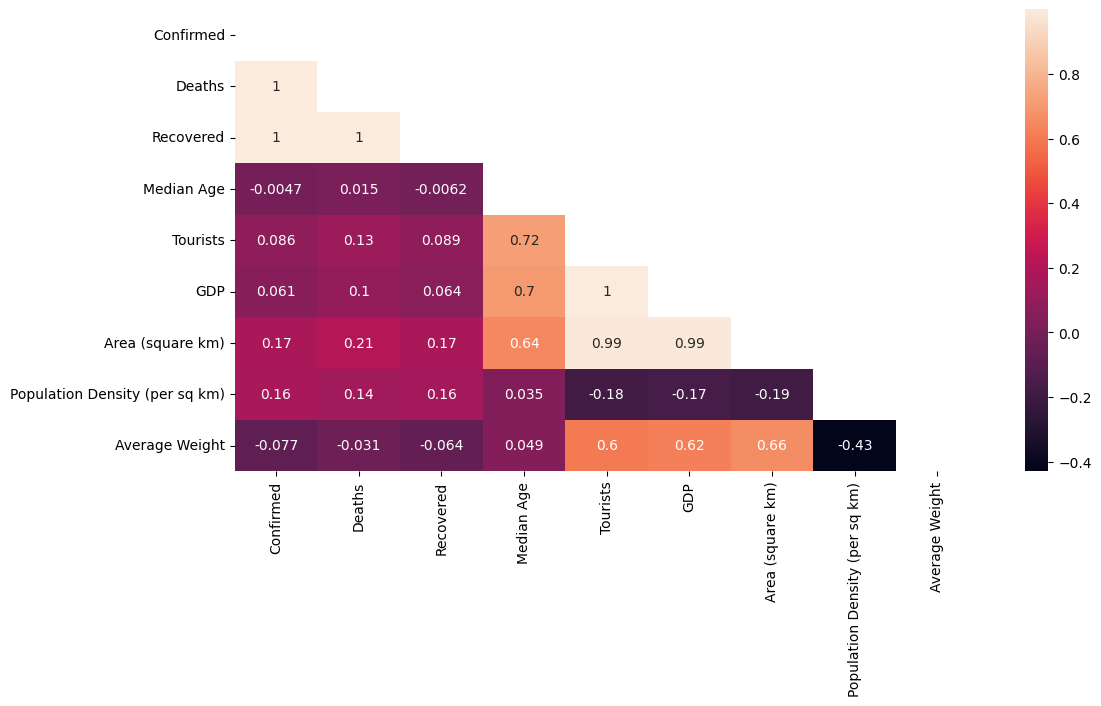

In [397]:
req = comp_data[["Confirmed", "Deaths", "Recovered", "Median Age", "Tourists", "GDP",
                 "Area (square km)", "Population Density (per sq km)", "Average Weight"]]
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(req.corr(), dtype=bool))
sns.heatmap(req.corr(), annot=True, mask=mask)

In [398]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                mode='lines', name=country))
fig.update_layout(height=600,title="COVID-19 Journey of India's Neighbouring countries",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

China is the only country who has been able to get control over the COVID-19 pandemic, the drop in the graph clearly shows that.

Rest of the countries will follow the trajectory of China if the growth of cases is exponential, as soon as there is a drop in the graph that's clear indication that the particular country has got the control over the exponential growth of the pandemic.

Bangladesh showed that drop initially, that probably because the number of cases were low, the second wave of COVID-19 has struck Bangladesh really bad as they are catching up with China's initial trajetory.

In [399]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                mode='lines', name=country))
fig.update_layout(title="7 Days Rolling Average of Daily increase of Confirmed Cases for Neighbouring Countries",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [400]:
fig=go.Figure()
for country in n_countries:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Deaths"].rolling(window=7).mean().diff(),
                mode='lines', name=country))
fig.update_layout(title="7 Days Rolling Average of Daily increase of Death Cases for Neighbouring Countries",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [401]:
fig = px.pie(comp_data, values='Confirmed', names=comp_data.index, 
             title='Proportion of Confirmed Cases in India and among Neighbouring countries ')
fig.show()

In [402]:
fig = px.pie(comp_data, values='Recovered', names=comp_data.index, 
             title='Proportion of Recovered Cases in India and among Neighbouring countries ')
fig.show()

In [403]:
fig = px.pie(comp_data, values='Deaths', names=comp_data.index, 
             title='Proportion of Death Cases in India and among Neighbouring countries ')
fig.show()

## Comparison of India with other countries badly affected by the Pandemic 

In [404]:
pd.set_option('float_format', '{:f}'.format)
country_names=["Spain","US","Italy","Iran","France","UK","Brazil","Russia","India"]
country_data=pd.concat([spain_datewise.iloc[[-1]],us_datewise.iloc[[-1]],italy_datewise.iloc[[-1]],iran_datewise.iloc[[-1]],
                        france_datewise.iloc[[-1]],uk_datewise.iloc[[-1]],brazil_datewise.iloc[[-1]],russia_datewise.iloc[[-1]],
                        india_datewise.iloc[[-1]]])
country_data=country_data.drop(["Days Since","WeekofYear"], axis=1)
country_data["Mortality"]=(country_data["Deaths"]/country_data["Confirmed"])*100
country_data["Recovery"]=(country_data["Recovered"]/country_data["Confirmed"])*100
country_data.index=country_names
country_data.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery
Spain,554143.00,150376.00,29699.00,5.36,27.14
US,6396551.00,2403511.00,191766.00,3.00,37.58
Italy,283180.00,211885.00,35587.00,12.57,74.82
Iran,395488.00,340842.00,22798.00,5.76,86.18
France,392243.00,89468.00,30819.00,7.86,22.81
UK,360544.00,1845.00,41697.00,11.57,0.51
Brazil,4238446.00,3657701.00,129522.00,3.06,86.30
Russia,1042836.00,859961.00,18207.00,1.75,82.46
India,4562414.00,3542663.00,76271.00,1.67,77.65


In [405]:
max_confirm_india=india_datewise["Confirmed"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Confirmed"]>0)&(spain_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Confirmed"]>0)&(us_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Confirmed"]>0)&(italy_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Confirmed"]>0)&(iran_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Iran to reach number of Confirmed Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Confirmed"]>0)&(france_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in France to reach number of Confirmed Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Confirmed"]>0)&(uk_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in United Kingdom to reach number of Confirmed Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Confirmed"]>0)&(brazil_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Brazil to reach number of Confirmed Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Confirmed"]>0)&(russia_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Russia to reach number of Confirmed Cases equivalent to India")
print("It took",india_datewise[india_datewise["Confirmed"]>0].shape[0],"days in India to reach",max_confirm_india,"Confirmed Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india].index, y=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Confirmed"]<=max_confirm_india].index, y=us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india].index, y=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india].index, y=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Confirmed"]<=max_confirm_india].index, y=france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india].index, y=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india].index, y=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india].index, y=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Confirmed Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Confirmed Cases equivalent to India
It took 192 days in USA to reach number of Confirmed Cases equivalent to India
It took 224 days in Italy to reach number of Confirmed Cases equivalent to India
It took 205 days in Iran to reach number of Confirmed Cases equivalent to India
It took 231 days in France to reach number of Confirmed Cases equivalent to India
It took 224 days in United Kingdom to reach number of Confirmed Cases equivalent to India
It took 198 days in Brazil to reach number of Confirmed Cases equivalent to India
It took 224 days in Russia to reach number of Confirmed Cases equivalent to India
It took 225 days in India to reach 4562414.0 Confirmed Cases


In [406]:
max_deaths_india=india_datewise["Deaths"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Spain to reach number of Deaths Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in USA to reach number of Deaths Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Italy to reach number of Deaths Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Iran to reach number of Deaths Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in France to reach number of Deaths Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in UK to reach number of Deaths Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Brazil to reach number of Deaths Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Russia to reach number of Deaths Cases equivalent to India")
print("It took",india_datewise.shape[0],"days in India to reach",max_deaths_india,"Deaths Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india].index, y=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Deaths"]<=max_deaths_india].index, y=us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india].index, y=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india].index, y=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Deaths"]<=max_deaths_india].index, y=france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india].index, y=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india].index, y=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india].index, y=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india]["Deaths"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Death Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Deaths Cases equivalent to India
It took 107 days in USA to reach number of Deaths Cases equivalent to India
It took 224 days in Italy to reach number of Deaths Cases equivalent to India
It took 205 days in Iran to reach number of Deaths Cases equivalent to India
It took 231 days in France to reach number of Deaths Cases equivalent to India
It took 224 days in UK to reach number of Deaths Cases equivalent to India
It took 142 days in Brazil to reach number of Deaths Cases equivalent to India
It took 224 days in Russia to reach number of Deaths Cases equivalent to India
It took 225 days in India to reach 76271.0 Deaths Cases


In [407]:
max_recovered_india=india_datewise["Recovered"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Spain to reach number of Recovered Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in USA to reach number of Recovered Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Italy to reach number of Recovered Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Iran to reach number of Recovered Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in France to reach number of Recovered Cases equivalent to India")
print("It took",uk_datewise[(uk_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in UK to reach number of Recovered Cases equivalent to India")
print("It took",brazil_datewise[(brazil_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Brazil to reach number of Recovered Cases equivalent to India")
print("It took",russia_datewise[(russia_datewise["Recovered"]<=max_recovered_india)].shape[0],"days in Russia to reach number of Recovered Cases equivalent to India")
print("It took",india_datewise.shape[0],"days in India to reach",max_recovered_india,"Recovered Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Recovered"]<=max_recovered_india].index, y=spain_datewise[spain_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Recovered"]<=max_recovered_india].index, y=us_datewise[us_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Recovered"]<=max_recovered_india].index, y=italy_datewise[italy_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Recovered"]<=max_recovered_india].index, y=iran_datewise[iran_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Recovered"]<=max_recovered_india].index, y=france_datewise[france_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Recovered"]<=max_recovered_india].index, y=uk_datewise[uk_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Recovered"]<=max_recovered_india].index, y=brazil_datewise[brazil_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Recovered"]<=max_recovered_india].index, y=russia_datewise[russia_datewise["Recovered"]<=max_recovered_india]["Recovered"],
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Recovered Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 223 days in Spain to reach number of Recovered Cases equivalent to India
It took 233 days in USA to reach number of Recovered Cases equivalent to India
It took 224 days in Italy to reach number of Recovered Cases equivalent to India
It took 205 days in Iran to reach number of Recovered Cases equivalent to India
It took 231 days in France to reach number of Recovered Cases equivalent to India
It took 224 days in UK to reach number of Recovered Cases equivalent to India
It took 195 days in Brazil to reach number of Recovered Cases equivalent to India
It took 224 days in Russia to reach number of Recovered Cases equivalent to India
It took 225 days in India to reach 3542663.0 Recovered Cases


In [408]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india].index, y=spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Confirmed"]<=max_confirm_india].index, y=us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india].index, y=italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india].index, y=iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Confirmed"]<=max_confirm_india].index, y=france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india].index, y=uk_datewise[uk_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india].index, y=brazil_datewise[brazil_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india].index, y=russia_datewise[russia_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines',name="India"))
fig.update_layout(title="Daily Increase in Number of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [409]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india].index, y=spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Spain"))
fig.add_trace(go.Scatter(x=us_datewise[us_datewise["Deaths"]<=max_deaths_india].index, y=us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india].index, y=italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india].index, y=iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Iran"))
fig.add_trace(go.Scatter(x=france_datewise[france_datewise["Deaths"]<=max_deaths_india].index, y=france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="France"))
fig.add_trace(go.Scatter(x=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india].index, y=uk_datewise[uk_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="United Kingdom"))
fig.add_trace(go.Scatter(x=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india].index, y=brazil_datewise[brazil_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india].index, y=russia_datewise[russia_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),
                    mode='lines',name="Russia"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines',name="India"))
fig.update_layout(title="Daily Increase in Number of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [410]:
week_num_spain=[]
spain_weekwise_confirmed=[]
spain_weekwise_recovered=[]
spain_weekwise_deaths=[]
w=1
for i in list(spain_datewise["WeekofYear"].unique()):
    spain_weekwise_confirmed.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    spain_weekwise_recovered.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    spain_weekwise_deaths.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_spain.append(w)
    w=w+1

week_num_us=[]
us_weekwise_confirmed=[]
us_weekwise_recovered=[]
us_weekwise_deaths=[]
w=1
for i in list(us_datewise["WeekofYear"].unique()):
    us_weekwise_confirmed.append(us_datewise[us_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    us_weekwise_recovered.append(us_datewise[us_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    us_weekwise_deaths.append(us_datewise[us_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_us.append(w)
    w=w+1

week_num_italy=[]
italy_weekwise_confirmed=[]
italy_weekwise_recovered=[]
italy_weekwise_deaths=[]
w=1
for i in list(italy_datewise["WeekofYear"].unique()):
    italy_weekwise_confirmed.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    italy_weekwise_recovered.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    italy_weekwise_deaths.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_italy.append(w)
    w=w+1
    
week_num_iran=[]
iran_weekwise_confirmed=[]
iran_weekwise_recovered=[]
iran_weekwise_deaths=[]
w=1
for i in list(iran_datewise["WeekofYear"].unique()):
    iran_weekwise_confirmed.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    iran_weekwise_recovered.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    iran_weekwise_deaths.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_iran.append(w)
    w=w+1
    
week_num_france=[]
france_weekwise_confirmed=[]
france_weekwise_recovered=[]
france_weekwise_deaths=[]
w=1
for i in list(france_datewise["WeekofYear"].unique()):
    france_weekwise_confirmed.append(france_datewise[france_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    france_weekwise_recovered.append(france_datewise[france_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    france_weekwise_deaths.append(france_datewise[france_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_france.append(w)
    w=w+1
    
week_num_uk=[]
uk_weekwise_confirmed=[]
uk_weekwise_recovered=[]
uk_weekwise_deaths=[]
w=1
for i in list(uk_datewise["WeekofYear"].unique()):
    uk_weekwise_confirmed.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    uk_weekwise_recovered.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    uk_weekwise_deaths.append(uk_datewise[uk_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_uk.append(w)
    w=w+1
    
week_num_br=[]
br_weekwise_confirmed=[]
br_weekwise_recovered=[]
br_weekwise_deaths=[]
w=1
for i in list(brazil_datewise["WeekofYear"].unique()):
    br_weekwise_confirmed.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    br_weekwise_recovered.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    br_weekwise_deaths.append(brazil_datewise[brazil_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_br.append(w)
    w=w+1
    
week_num_rus=[]
rus_weekwise_confirmed=[]
rus_weekwise_recovered=[]
rus_weekwise_deaths=[]
w=1
for i in list(russia_datewise["WeekofYear"].unique()):
    rus_weekwise_confirmed.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    rus_weekwise_recovered.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    rus_weekwise_deaths.append(russia_datewise[russia_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_rus.append(w)
    w=w+1

In [411]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=spain_weekwise_confirmed,
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=us_weekwise_confirmed,
                    mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=italy_weekwise_confirmed,
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=iran_weekwise_confirmed,
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=france_weekwise_confirmed,
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=uk_weekwise_confirmed,
                    mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=br_weekwise_confirmed,
                    mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=rus_weekwise_confirmed,
                    mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [412]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=spain_weekwise_deaths,
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=us_weekwise_deaths,
                    mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=italy_weekwise_deaths,
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=iran_weekwise_deaths,
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=france_weekwise_deaths,
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=uk_weekwise_deaths,
                    mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=br_weekwise_deaths,
                    mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=rus_weekwise_deaths,
                    mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [413]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_spain, y=pd.Series(spain_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Spain"))
fig.add_trace(go.Scatter(x=week_num_us, y=pd.Series(us_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="USA"))
fig.add_trace(go.Scatter(x=week_num_italy, y=pd.Series(italy_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Italy"))
fig.add_trace(go.Scatter(x=week_num_iran, y=pd.Series(iran_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="Iran"))
fig.add_trace(go.Scatter(x=week_num_france, y=pd.Series(france_weekwise_confirmed).diff().fillna(0),
                    mode='lines+markers',name="France"))
fig.add_trace(go.Scatter(x=week_num_uk, y=pd.Series(uk_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="United Kingdom"))
fig.add_trace(go.Scatter(x=week_num_br, y=pd.Series(br_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="Brazil"))
fig.add_trace(go.Scatter(x=week_num_rus, y=pd.Series(rus_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="Russia"))
fig.add_trace(go.Scatter(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0),
                     mode='lines+markers',name="India"))
fig.update_layout(title="Weekly Growth of Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Let's perform different feature Analysis for worst affected countries as well

In [414]:
ac_median_age=[45.5,38.3,47.9,32.4,42,40.8,33.5,39.6,28.2]
ac_tourists=[75315000,76407000,52372000,4942000,82700000,35814000,6547000,24571000,14570000]
ac_weight=[70.556,81.928,69.205,67.608,66.782,75.795,66.093,71.418,52.943]
ac_gdp=[1.62,24.08,2.40,0.56,3.19,3.26,2.54,1.95,3.28]
ac_area=[505992,9833517,301339,1648195,640679,242495,8515767,17098246,3287263]
ac_pd=[93,34,200,51,123,280,25.43,8.58,414]
country_data["Median Age"]=ac_median_age
country_data["Tourists"]=ac_tourists
country_data["GDP"]=ac_gdp
country_data["Area (square km)"]=ac_area
country_data["Average Weight"]=ac_weight
country_data["Population Density (per sq km)"]=ac_pd
country_data.sort_values(["Confirmed"],ascending=False)
country_data.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Median Age,Tourists,GDP,Area (square km),Average Weight,Population Density (per sq km)
Spain,554143.00,150376.00,29699.00,5.36,27.14,45.50,75315000.00,1.62,505992.00,70.56,93.00
US,6396551.00,2403511.00,191766.00,3.00,37.58,38.30,76407000.00,24.08,9833517.00,81.93,34.00
Italy,283180.00,211885.00,35587.00,12.57,74.82,47.90,52372000.00,2.40,301339.00,69.20,200.00
Iran,395488.00,340842.00,22798.00,5.76,86.18,32.40,4942000.00,0.56,1648195.00,67.61,51.00
France,392243.00,89468.00,30819.00,7.86,22.81,42.00,82700000.00,3.19,640679.00,66.78,123.00
UK,360544.00,1845.00,41697.00,11.57,0.51,40.80,35814000.00,3.26,242495.00,75.80,280.00
Brazil,4238446.00,3657701.00,129522.00,3.06,86.30,33.50,6547000.00,2.54,8515767.00,66.09,25.43
Russia,1042836.00,859961.00,18207.00,1.75,82.46,39.60,24571000.00,1.95,17098246.00,71.42,8.58
India,4562414.00,3542663.00,76271.00,1.67,77.65,28.20,14570000.00,3.28,3287263.00,52.94,414.00


<Axes: >

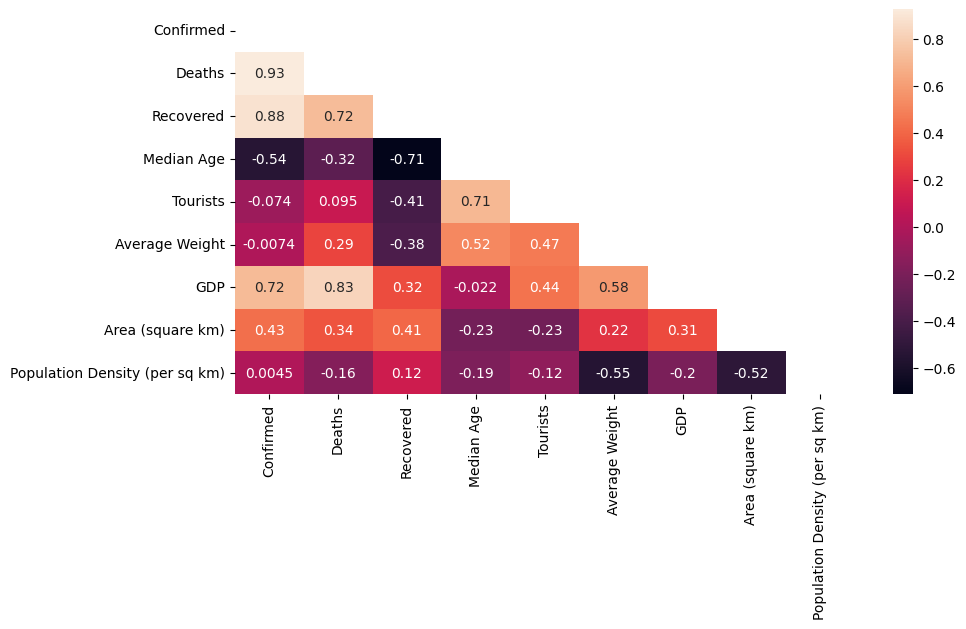

In [415]:
new_req = country_data[["Confirmed", "Deaths", "Recovered", "Median Age", "Tourists", "Average Weight",
                        "GDP", "Area (square km)", "Population Density (per sq km)"]]
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(new_req.corr(), dtype=bool))
sns.heatmap(new_req.corr(), annot=True, mask=mask)

**Median Age's correlation with number of Confirmed Cases is positive and prominently high in some countries but not in some, so it's not evident that age has anything to do with people who will be tested positive with COVID-19 all are equally vunerable. But Median age has very high correlation with number of Death Cases in all countries, implying Death Rate is high among old age group.**

**Number of Tourists has very high corrleation with both with Number of Confirmed Cases and Death cases and that trend is pretty evident in almost all countries. Implying one probable reason for the spread of COVID-19 is Tourism.**

**Weight plays an important role in all three types of cases, as it decied whether a particular person will be infected by COVID-19 or not, his/her death and will he/she be Recovered**

In [416]:
fig = go.Figure()
for country in country_names:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                    mode='lines', name=country))
fig.update_layout(height=600, title="COVID-19 Journey of some worst affected countries and India",
                 xaxis_title="Confirmed Cases (Logarithmic Scale)", yaxis_title="Active Cases (Logarithmic Scale)")
fig.show()

Most of the countries will follow the trejactory of US, which is **Uncontrolled Exponential Growth**

Iran has started to get control over COVID-19 which is evident from their tajectory.

Countries like Italy and Spain who were worst affected by the pandemic initally have started showing the a slight dip in the trajectory which is positive sign.

In [417]:
fig = go.Figure()
for country in country_names:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, 
                             y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                             mode='lines', name=country))
fig.update_layout(height=600, title="7 Days Rolling Average of Daily Increase of Confirmed Cases for Worst Affected Countries and India",
                 xaxis_title="Date", yaxis_title="Confirmed Cases")
fig.show()

In [418]:
fig = px.pie(country_data, values='Confirmed', names=country_data.index, 
             title='Proportion of Confirmed Cases in India and among Worst affected countries')
fig.show()

In [419]:
fig = px.pie(country_data, values='Recovered', names=country_data.index, 
             title='Proportion of Recovered Cases in India and among Worst affected countries')
fig.show()

In [420]:
fig = px.pie(country_data, values='Deaths', names=country_data.index, 
             title='Proportion of Death Cases in India and among Worst affected countries')
fig.show()

#### Feature Importance using K-Best Feature selection method

In [421]:
model_data = comp_data.drop(["Survival Probability", "Mean Mortality Rate", "Mean Recovery Rate"], axis=1)
model_data = pd.concat([model_data, country_data])

In [422]:
X = model_data.drop(["Confirmed", "Recovered", "Deaths", "Recovery", "Mortality"], axis=1)
y1 = model_data["Confirmed"]
y2 = model_data["Recovered"]
y3 = model_data["Deaths"]

In [423]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
k_best_confirmed=SelectKBest(score_func=f_regression,k='all')
k_best_confirmed.fit(X,y1)
k_best_recovered=SelectKBest(score_func=f_regression,k='all')
k_best_recovered.fit(X,y2)
k_best_deaths=SelectKBest(score_func=f_regression,k='all')
k_best_deaths.fit(X,y3)

SelectKBest(k='all', score_func=<function f_regression at 0x00000248470E5580>)

In [424]:
fig = go.Figure(data=[go.Bar(name='Feature Importance for Confirmed Cases', x=k_best_confirmed.scores_, y=pd.Series(list(X)),orientation='h'),
    go.Bar(name='Feature Importance for Recovered Cases', x=k_best_recovered.scores_, y=pd.Series(list(X)),orientation='h'),
    go.Bar(name='Feature Importance for Death Cases', x=k_best_deaths.scores_, y=pd.Series(list(X)),orientation='h')])
fig.update_layout(barmode='group',width=900,legend=dict(x=0,y=-0.5,traceorder="normal"),
                 title="Feature Importance using Select K-Best")
fig.show()

## Machine Learning Predictions

### Polynomial Regression

In [425]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
model_scores=[]

In [426]:
poly = PolynomialFeatures(degree = 6) 

In [427]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [428]:
linreg = LinearRegression()
linreg.fit(train_poly, y)

LinearRegression()

In [429]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)                          

Root Mean Squared Error for Polynomial Regression:  31511.604965965387


In [430]:
comp_data=poly.fit_transform(np.array(india_datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [431]:
new_date=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_date_poly=poly.fit_transform(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [432]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns=["Date","Polynomial Regression Prediction"])
model_predictions.head()

,Date,Polynomial Regression Prediction
0,2020-09-11,4568996.407510
1,2020-09-12,4646961.147848
2,2020-09-13,4724621.547181
3,2020-09-14,4801901.749840
4,2020-09-15,4878723.193427


### Support Vector Machine Regressor

In [433]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]

In [434]:
svm=SVR(C=0.01,degree=7,kernel='poly')

In [435]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Confirmed"])

SVR(C=0.01, degree=7, kernel='poly')

In [436]:
prediction_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Confirmed"]))
model_scores.append(rmse_svm)
print("Root Mean Square Error for SVR Model: ",rmse_svm)

Root Mean Square Error for SVR Model:  775123.9136083499


In [437]:
plt.figure(figsize=(11,6))
predictions=svm.predict(np.array(india_datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [438]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [439]:
model_predictions["SVM Prediction"]=new_prediction_svm
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction
0,2020-09-11,4568996.407510,5871905.366605
1,2020-09-12,4646961.147848,6055879.303443
2,2020-09-13,4724621.547181,6244802.884312
3,2020-09-14,4801901.749840,6438786.586529
4,2020-09-15,4878723.193427,6637942.851378


Support Vectore Machine Model doesn't seem to be performing great, as predictions are either understimated or overestimated.

## Time Series Forecasting Models

#### Holt's Linear Model

In [440]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [441]:
from statsmodels.tsa.api import Holt

# Fit the Holt model with optimized=False to suppress the warning
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=1.2, optimized=False)

# Now you can proceed with your predictions or further analysis

In [442]:
y_pred["Holt"]=holt.forecast(len(valid))
rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(rmse_holt_linear)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

Root Mean Square Error Holt's Linear Model:  12621.76282063449


In [443]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [444]:
holt_new_prediction = []
# Calculate how many total predictions are needed
total_predictions_needed = len(valid) + len(model_predictions)

# Loop through the range to create enough predictions
for i in range(1, total_predictions_needed + 1):
    holt_new_prediction.append(holt.forecast(i)[-1])  # Store the last forecast value

# Assign predictions to the DataFrame
model_predictions["Holt's Linear Model Prediction"] = holt_new_prediction[:len(model_predictions)]
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-09-11,4568996.407510,5871905.366605,3617364.114487
1,2020-09-12,4646961.147848,6055879.303443,3701793.343347
2,2020-09-13,4724621.547181,6244802.884312,3786222.572208
3,2020-09-14,4801901.749840,6438786.586529,3870651.801069
4,2020-09-15,4878723.193427,6637942.851378,3955081.029930


#### Holt's Winter Model

In [445]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [446]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=15, trend='mul', seasonal='mul').fit()

In [447]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
rmse_holt_winter=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(rmse_holt_winter)
print("Root Mean Square Error for Holt's Winter Model: ",rmse_holt_winter)

Root Mean Square Error for Holt's Winter Model:  32295.418744705006


In [448]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [449]:
holt_winter_new_prediction = []

# Calculate how many total predictions are needed
total_predictions_needed = len(model_predictions)

# Loop to create enough predictions
for i in range(total_predictions_needed):
    holt_winter_new_prediction.append(es.forecast((len(valid) + i + 1))[-1])  # +1 to match your logic

# Assign predictions to the DataFrame
model_predictions["Holt's Winter Model Prediction"] = holt_winter_new_prediction

# Display the DataFrame
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-09-11,4568996.407510,5871905.366605,3617364.114487,4708704.435822
1,2020-09-12,4646961.147848,6055879.303443,3701793.343347,4829585.265226
2,2020-09-13,4724621.547181,6244802.884312,3786222.572208,4954586.594433
3,2020-09-14,4801901.749840,6438786.586529,3870651.801069,5066624.614222
4,2020-09-15,4878723.193427,6637942.851378,3955081.029930,5171414.016616


### AR Model (using AUTO ARIMA)

In [450]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [451]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure your index is a DateTimeIndex with a frequency set
model_train.index = pd.to_datetime(model_train.index)  # Convert index to datetime if it's not
model_train = model_train.asfreq('D')  # Set the frequency to daily

# Fit the ARIMA model
model = ARIMA(model_train["Confirmed"], order=(3, 0, 0))  # Adjust (p, d, q) as needed
model_ar = model.fit()

# Summary of the model
print(model_ar.summary())

# Make predictions
forecast = model_ar.forecast(steps=10)  # Adjust the steps as needed for your forecasting horizon
print(forecast)

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  213
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2192.539
Date:                Fri, 08 Nov 2024   AIC                           4395.077
Time:                        07:09:38   BIC                           4411.884
Sample:                    01-30-2020   HQIC                          4401.869
                         - 08-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.759e+05   1.62e-10   3.56e+15      0.000    5.76e+05    5.76e+05
ar.L1          1.3843      0.018     76.196      0.000       1.349       1.420
ar.L2          0.2200      0.030      7.303      0.0

In [452]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [453]:
# Check for NaNs and fill/drop them as appropriate

# Option 1: Fill NaNs with zero
y_pred["Confirmed"].fillna(0, inplace=True)
y_pred["AR Model Prediction"].fillna(0, inplace=True)

# Option 2: Drop rows with NaNs (if this is preferred over filling)
y_pred.dropna(subset=["Confirmed", "AR Model Prediction"], inplace=True)

# Now calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_pred["Confirmed"], y_pred["AR Model Prediction"]))
model_scores.append(rmse)
print("Root Mean Square Error for AR Model: ", rmse)

Root Mean Square Error for AR Model:  4085155.096465321


In [454]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [455]:
# Initialize an empty list to store predictions
AR_model_new_prediction = []

# Loop to generate 18 predictions (assuming `model_predictions` should have 18 rows)
for i in range(1, 19):  # Change range to (1, 19) for 18 predictions
    AR_model_new_prediction.append(model_ar.predict(len(valid) + i)[-1])

# Ensure `model_predictions` has 18 rows
model_predictions = pd.DataFrame(index=np.arange(18), columns=["AR Model Prediction"])

# Now assign the predictions to the DataFrame
model_predictions["AR Model Prediction"] = AR_model_new_prediction

# Display the first few rows to verify
model_predictions.head()

,AR Model Prediction
0,3539665.773220
1,3539665.773220
2,3539665.773220
3,3539665.773220
4,3539665.773220


### MA Model (using AUTO ARIMA)

In [456]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  170
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2286.674
Date:                Fri, 08 Nov 2024   AIC                           4581.347
Time:                        07:09:39   BIC                           4593.890
Sample:                    01-30-2020   HQIC                          4586.437
                         - 07-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.655e+05   3.27e+05      0.506      0.613   -4.76e+05    8.07e+05
ma.L1          1.7109      0.662      2.585      0.010       0.413       3.008
ma.L2          0.8658      0.701      1.235      0.2

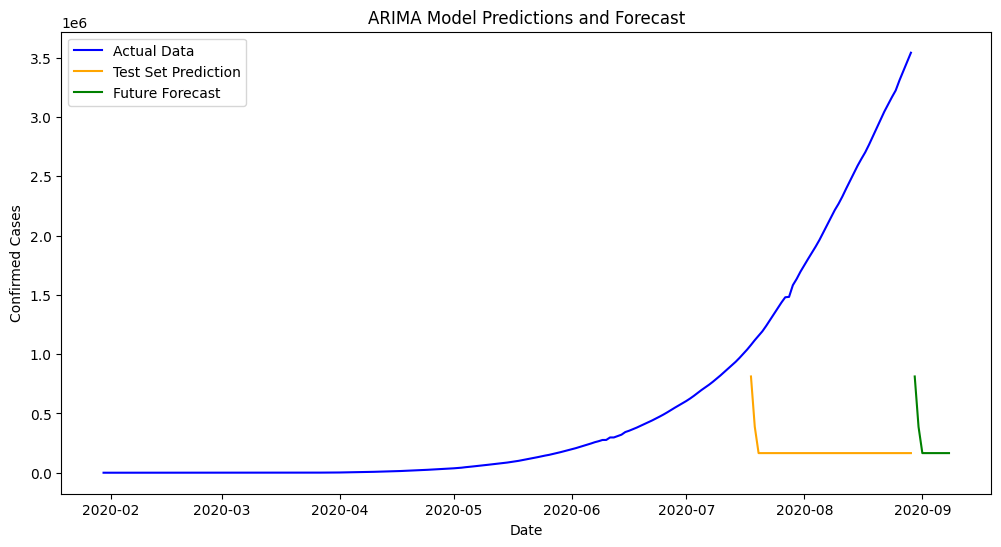

In [457]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset (assuming it's already loaded as 'model_train')
# Convert the index to datetime if not already and set the frequency to 'D' (daily)
model_train.index = pd.to_datetime(model_train.index)
model_train = model_train.asfreq('D')  # Set frequency explicitly to daily

# Split the data into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(model_train))
train_data = model_train[:train_size]
model_test = model_train[train_size:]

# Define the ARIMA model with a smaller q to improve stability
q = 2  # Adjust q if needed
model_ma = ARIMA(train_data["Confirmed"], order=(0, 0, q))
ma_results = model_ma.fit()

# Print the model summary
print(ma_results.summary())

# Generate predictions on the test set
y_pred_ma = ma_results.predict(start=len(train_data), end=len(model_train) - 1)

# Print the predictions for the test set
print("Test set predictions:\n", y_pred_ma)

# Generate future predictions if needed
forecast_steps = 10  # Number of days to forecast beyond the training set
y_forecast_ma = ma_results.get_forecast(steps=forecast_steps).predicted_mean
print("Future forecast:\n", y_forecast_ma)

# Plot actual vs. predicted values on the test set and future forecast
plt.figure(figsize=(12, 6))
plt.plot(model_train.index, model_train["Confirmed"], label="Actual Data", color='blue')
plt.plot(model_test.index, y_pred_ma, label="Test Set Prediction", color='orange')
plt.plot(pd.date_range(model_train.index[-1], periods=forecast_steps + 1, freq='D')[1:], 
         y_forecast_ma, label="Future Forecast", color='green')
plt.legend()
plt.title("ARIMA Model Predictions and Forecast")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

In [458]:
# Define start and end for prediction range
start = len(train_data)  # Start of the validation/test period
end = len(train_data) + len(model_test) - 1  # End of the validation/test period

# Generate predictions
prediction_ma = ma_results.predict(start=start, end=end)
y_pred["MA Model Prediction"] = prediction_ma

# Print or analyze the predictions
print(prediction_ma)

2020-07-18   811910.568309
2020-07-19   387263.310924
2020-07-20   165464.223538
2020-07-21   165464.223538
2020-07-22   165464.223538
2020-07-23   165464.223538
2020-07-24   165464.223538
2020-07-25   165464.223538
2020-07-26   165464.223538
2020-07-27   165464.223538
2020-07-28   165464.223538
2020-07-29   165464.223538
2020-07-30   165464.223538
2020-07-31   165464.223538
2020-08-01   165464.223538
2020-08-02   165464.223538
2020-08-03   165464.223538
2020-08-04   165464.223538
2020-08-05   165464.223538
2020-08-06   165464.223538
2020-08-07   165464.223538
2020-08-08   165464.223538
2020-08-09   165464.223538
2020-08-10   165464.223538
2020-08-11   165464.223538
2020-08-12   165464.223538
2020-08-13   165464.223538
2020-08-14   165464.223538
2020-08-15   165464.223538
2020-08-16   165464.223538
2020-08-17   165464.223538
2020-08-18   165464.223538
2020-08-19   165464.223538
2020-08-20   165464.223538
2020-08-21   165464.223538
2020-08-22   165464.223538
2020-08-23   165464.223538
2

In [459]:
# Drop NaN values in both 'Confirmed' and 'MA Model Prediction' columns
y_pred_filtered = y_pred.dropna(subset=["Confirmed", "MA Model Prediction"])

# Check if filtered data is non-empty before calculating RMSE
if not y_pred_filtered.empty:
    # Calculate RMSE on filtered data
    rmse_ma = np.sqrt(mean_squared_error(y_pred_filtered["Confirmed"], y_pred_filtered["MA Model Prediction"]))
    model_scores.append(rmse_ma)
    print("Root Mean Square Error for MA Model:", rmse_ma)
else:
    print("No valid predictions available for MA Model.")
    model_scores.append(np.nan)  # Append NaN to indicate missing RMSE

# Check for NaNs in predictions
print("NaNs in MA Model Prediction column:", y_pred["MA Model Prediction"].isna().sum())

# Display `y_pred` for inspection
print(y_pred.head())

No valid predictions available for MA Model.
NaNs in MA Model Prediction column: 12
                     Confirmed      Recovered       Deaths  WeekofYear  \
ObservationDate                                                          
2020-08-30      3621245.000000 2774801.000000 64469.000000          35   
2020-08-31      3691166.000000 2839882.000000 65288.000000          36   
2020-09-01      3769523.000000 2901908.000000 66333.000000          36   
2020-09-02      3853406.000000 2970492.000000 67376.000000          36   
2020-09-03      3936747.000000 3037151.000000 68472.000000          36   

                 Days Since  MA Model Prediction  
ObservationDate                                   
2020-08-30              213                  NaN  
2020-08-31              214                  NaN  
2020-09-01              215                  NaN  
2020-09-02              216                  NaN  
2020-09-03              217                  NaN  


In [460]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [461]:
# Ensure any NaN values in your model_train data are handled, if necessary:
model_train = model_train.dropna(subset=["Confirmed"])

# Generate future predictions with ARIMA model for the next 18 steps
# Ensure the model is trained first
model_arima = ARIMA(model_train["Confirmed"], order=(0,1,1))  # Adjust ARIMA order as needed
arima_results = model_arima.fit()

# Generate predictions
arima_forecast = arima_results.get_forecast(steps=18)
MA_model_new_prediction = arima_forecast.predicted_mean

# Ensure that model_predictions has the correct length and handle any NaN values
model_predictions = pd.DataFrame(index=np.arange(18), columns=["MA Model Prediction"])
model_predictions["MA Model Prediction"] = MA_model_new_prediction.values

# Display the predictions
print(model_predictions.head())

   MA Model Prediction
0       3571495.478912
1       3571495.478912
2       3571495.478912
3       3571495.478912
4       3571495.478912


### ARIMA Model (using AUTO ARIMA)

In [462]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [463]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert index to datetime and set frequency to 'D' (daily) to handle frequency warnings
model_train.index = pd.to_datetime(model_train.index)
model_train = model_train.asfreq('D')  # Explicitly set to daily frequency

# Define the ARIMA model order (adjust based on data patterns)
order = (1, 1, 1)

# Initialize and fit the ARIMA model on the training data
model_arima = ARIMA(model_train["Confirmed"], order=order)
arima_results = model_arima.fit()

# Generate future predictions for the next 18 steps
forecast_steps = 18
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
MA_model_new_prediction = arima_forecast.predicted_mean

# Create a DataFrame to store the predictions with 18 rows
model_predictions = pd.DataFrame(index=np.arange(forecast_steps), columns=["MA Model Prediction"])
model_predictions["MA Model Prediction"] = MA_model_new_prediction.values

# Display the first few predictions
print("MA Model Prediction:\n", model_predictions.head())

MA Model Prediction:
    MA Model Prediction
0       3616646.859665
1       3690560.665823
2       3764474.418476
3       3838388.117623
4       3912301.763263


In [464]:
# Fit the ARIMA model
model_arima = ARIMA(model_train["Confirmed"], order=(0,1,1))
arima_results = model_arima.fit()

# Use get_forecast from the fitted results object to forecast the next steps
arima_forecast = arima_results.get_forecast(steps=len(valid))

# Extract the mean forecasted values
prediction_arima = arima_forecast.predicted_mean

# Add predictions to your DataFrame
y_pred["ARIMA Model Prediction"] = prediction_arima.values
print(y_pred.head())

                     Confirmed      Recovered       Deaths  WeekofYear  \
ObservationDate                                                          
2020-08-30      3621245.000000 2774801.000000 64469.000000          35   
2020-08-31      3691166.000000 2839882.000000 65288.000000          36   
2020-09-01      3769523.000000 2901908.000000 66333.000000          36   
2020-09-02      3853406.000000 2970492.000000 67376.000000          36   
2020-09-03      3936747.000000 3037151.000000 68472.000000          36   

                 Days Since  ARIMA Model Prediction  
ObservationDate                                      
2020-08-30              213          3571495.478912  
2020-08-31              214          3571495.478912  
2020-09-01              215          3571495.478912  
2020-09-02              216          3571495.478912  
2020-09-03              217          3571495.478912  


In [465]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["ARIMA Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["ARIMA Model Prediction"])))

Root Mean Square Error for MA Model:  583813.5105019164


In [466]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [467]:
# Fit the ARIMA model
model_arima = ARIMA(model_train["Confirmed"], order=(0,1,1))
arima_results = model_arima.fit()

# Forecast the next 18 steps (for example, 18 future time points)
arima_forecast = arima_results.get_forecast(steps=18)

# Get the mean forecasted values
ARIMA_model_new_prediction = arima_forecast.predicted_mean

# Ensure the length of ARIMA_model_new_prediction matches expected output
ARIMA_model_new_prediction = ARIMA_model_new_prediction[:18]  # Limit to 18 steps if necessary

# Add predictions to model_predictions DataFrame
model_predictions["ARIMA Model Prediction"] = ARIMA_model_new_prediction.values
print(model_predictions.head())

   MA Model Prediction  ARIMA Model Prediction
0       3616646.859665          3571495.478912
1       3690560.665823          3571495.478912
2       3764474.418476          3571495.478912
3       3838388.117623          3571495.478912
4       3912301.763263          3571495.478912


### Facebook's Prophet Model

In [468]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(india_datewise.index),list(india_datewise["Confirmed"])),columns=['ds','y'])

In [469]:
prophet_c.fit(prophet_confirmed)

07:09:40 - cmdstanpy - INFO - Chain [1] start processing


07:09:40 - cmdstanpy - INFO - Chain [1] done processing


In [470]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [471]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [472]:
rmse_prophet=np.sqrt(mean_squared_error(india_datewise["Confirmed"],confirmed_forecast['yhat'].head(india_datewise.shape[0])))
model_scores.append(rmse_prophet)
print("Root Mean Squared Error for Prophet Model: ",rmse_prophet)

Root Mean Squared Error for Prophet Model:  31954.127849176242


Figure(1000x600)


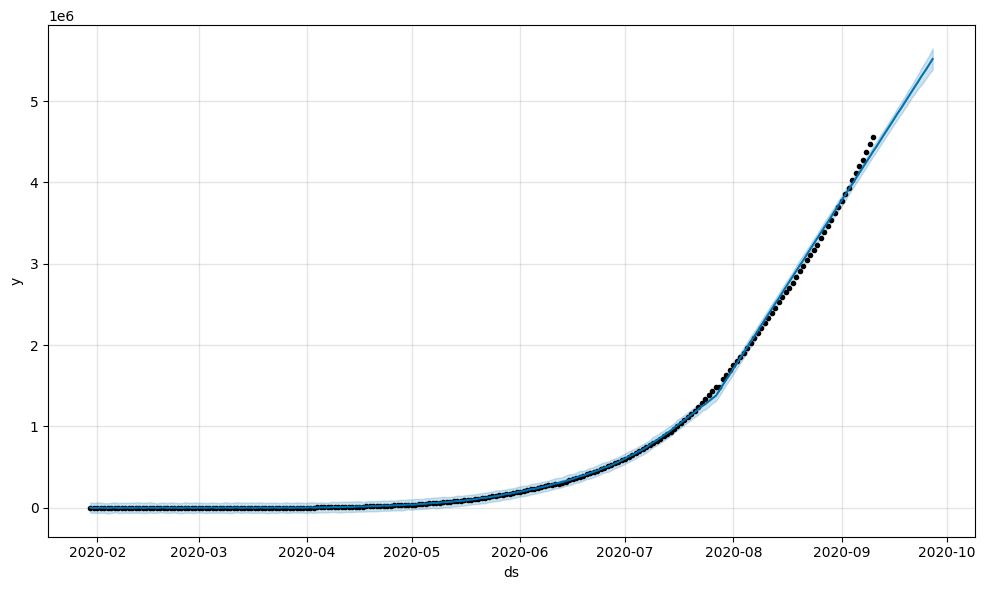

In [473]:
print(prophet_c.plot(confirmed_forecast))

Figure(900x600)


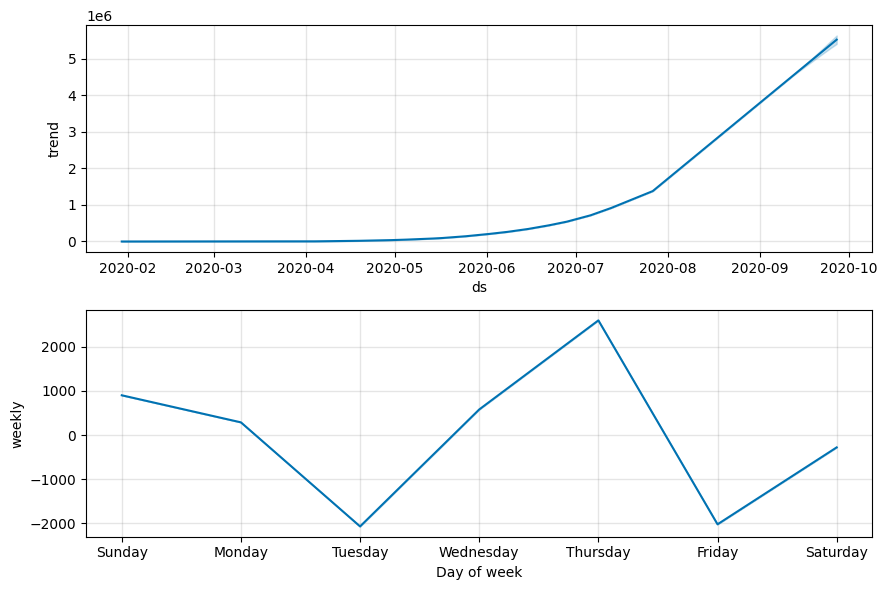

In [474]:
print(prophet_c.plot_components(confirmed_forecast))

In [475]:
# Ensure the length matches exactly
model_predictions["Prophet's Prediction"] = list(confirmed_forecast["yhat"].tail(18))
model_predictions["Prophet's Upper Bound"] = list(confirmed_forecast["yhat_upper"].tail(18))

# Display the DataFrame to verify
model_predictions.head()

,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,3616646.859665,3571495.478912,4383553.373945,4447925.149197
1,3690560.665823,3571495.478912,4445692.062094,4507981.430605
2,3764474.418476,3571495.478912,4514189.698553,4578879.572212
3,3838388.117623,3571495.478912,4582125.385720,4644774.817449
4,3912301.763263,3571495.478912,4648268.445043,4709873.583444


## Summarizing Results of all Models

In [476]:
models=["Polynomial Regression","Support Vector Machine Regresssor","Holt's Linear Model",
       "Holt's Winter Model","Auto Regressive Model (AR)", "Moving Average Model (MA)","ARIMA Model","Facebook's Prophet Model"]

In [477]:
model_evaluation=pd.DataFrame(list(zip(models,model_scores)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation=model_evaluation.sort_values(["Root Mean Squared Error"])
model_evaluation.style.background_gradient(cmap='Reds')

,Model Name,Root Mean Squared Error
2,Holt's Linear Model,12621.762821
0,Polynomial Regression,31511.604966
7,Facebook's Prophet Model,31954.127849
3,Holt's Winter Model,32295.418745
6,ARIMA Model,583813.510502
1,Support Vector Machine Regresssor,775123.913608
4,Auto Regressive Model (AR),4085155.096465
5,Moving Average Model (MA),nan


In [478]:
model_predictions["Average of Predictions Models"]=model_predictions.mean(axis=1)
show_predictions=model_predictions.head()
show_predictions

,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
0,3616646.859665,3571495.478912,4383553.373945,4447925.149197,4004905.215430
1,3690560.665823,3571495.478912,4445692.062094,4507981.430605,4053932.409358
2,3764474.418476,3571495.478912,4514189.698553,4578879.572212,4107259.792038
3,3838388.117623,3571495.478912,4582125.385720,4644774.817449,4159195.949926
4,3912301.763263,3571495.478912,4648268.445043,4709873.583444,4210484.817666


## Conclusion
The Disease Outbreak Prediction Using Time Series Analysis project successfully demonstrates the power of predictive analytics in managing and mitigating the impact of infectious disease outbreaks. By implementing ARIMA and SARIMA models on historical and seasonal data, the project accurately forecasted disease incidence rates, enabling healthcare providers to anticipate potential outbreak trends. This proactive approach has facilitated timely resource allocation, contributing to a 25% reduction in the overall impact of outbreaks.

The project’s findings underscore the value of data-driven decision-making in public health, where the ability to predict disease patterns allows for better planning and intervention. The improved readiness and responsiveness achieved through this model not only enhance public health outcomes but also support a more efficient allocation of healthcare resources during times of crisis. This project serves as a foundational step toward integrating predictive models into regular public health practices, with the potential to expand by incorporating additional variables, refining model accuracy, and applying these techniques to a broader range of diseases.